In [1]:
import pandas as pd
import numpy as np 
from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-a46753b164f9>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook().pandas()


C:\Users\piyus\anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
#df1=pd.read_csv(r'C:\Users\piyus\Downloads\suicide_watch\Cleaned_Depression_Vs_Suicide.csv', lineterminator = '\n')
#df2=pd.read_csv(r'C:\Users\piyus\Downloads\suicide_watch\pushshift_dep_2L.csv')
#df3=pd.read_csv(r'C:\Users\piyus\Downloads\suicide_watch\pushshift_SW_2L.csv')

In [3]:
# df1=df1.sample(100000).reset_index(drop=True)

In [4]:
#df1.to_csv('data.csv')

In [5]:
df1=pd.read_csv('data.csv')
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
print(df1.columns)
# print(df2.columns)
# print(df3.columns)


Index(['Post_id', 'Title', 'Body', 'Score', 'Publish_date',
       'Total_no_of_comments', 'Over_18', 'Subreddit'],
      dtype='object')


In [7]:
print(df1.shape)
# print(df2.shape)
# print(df3.shape)

(100000, 8)


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Post_id               100000 non-null  object
 1   Title                 100000 non-null  object
 2   Body                  100000 non-null  object
 3   Score                 100000 non-null  int64 
 4   Publish_date          100000 non-null  object
 5   Total_no_of_comments  100000 non-null  int64 
 6   Over_18               100000 non-null  bool  
 7   Subreddit             100000 non-null  object
dtypes: bool(1), int64(2), object(5)
memory usage: 5.4+ MB


In [9]:
df1['Subreddit'].value_counts(normalize=True,dropna=False)

SuicideWatch    0.52476
depression      0.47524
Name: Subreddit, dtype: float64

In [10]:
print(df1['Score'].nunique())
df1['Score'].value_counts(normalize=True,dropna=False)

418


1      0.43158
2      0.17452
3      0.11050
4      0.04464
5      0.04103
        ...   
540    0.00001
347    0.00001
218    0.00001
793    0.00001
477    0.00001
Name: Score, Length: 418, dtype: float64

In [11]:
print(df1['Total_no_of_comments'].nunique())
df1['Total_no_of_comments'].value_counts(normalize=True,dropna=False)

198


1       0.20634
0       0.16775
2       0.15462
3       0.10578
4       0.07546
         ...   
138     0.00001
297     0.00001
361     0.00001
147     0.00001
1215    0.00001
Name: Total_no_of_comments, Length: 198, dtype: float64

In [12]:
print(df1['Over_18'].nunique())
df1['Over_18'].value_counts(normalize=True,dropna=False)

2


False    0.99821
True     0.00179
Name: Over_18, dtype: float64

In [13]:
df1.groupby(['Subreddit']).apply(lambda x:x['Over_18'].value_counts(normalize=True,dropna=False))

Over_18,False,True
Subreddit,,
SuicideWatch,0.997618,0.002382
depression,0.998864,0.001136


In [14]:
df1.groupby(['Over_18']).apply(lambda x:x['Subreddit'].value_counts(normalize=True,dropna=False))

Subreddit,SuicideWatch,depression
Over_18,,
False,0.524449,0.475551
True,0.698324,0.301676


In [15]:
df1['Post_id'].nunique()==len(df1)

True

In [16]:
print(df1.isna().sum())
df1.head(1)

Post_id                 0
Title                   0
Body                    0
Score                   0
Publish_date            0
Total_no_of_comments    0
Over_18                 0
Subreddit               0
dtype: int64


,Post_id,Title,Body,Score,Publish_date,Total_no_of_comments,Over_18,Subreddit
0,7pqu7l,Is it normal to feel suicidal if your'e disabled?,"Im suicidal because im disabled (autistic), im...",1,2018-01-11 20:03:57,2,False,SuicideWatch


In [17]:
# # manual check for text to identify the words manually
# for i in df1.columns:
#     print(i)
#     print('     ', df1.loc[2,i]);
#     print('>>>>>')
print(df1['Title'].head())
print(df1['Body'].head())

0    Is it normal to feel suicidal if your'e disabled?
1         I don't think things can continue like this.
2      Hate my home life, but have nowhere else to go.
3                  I've started to stress-sleep again.
4       I planned on going back to work an hour ago...
Name: Title, dtype: object
0    Im suicidal because im disabled (autistic), im...
1    If the next 30 years are like the last 30, I a...
2    My brother sleeps all day and parties all nigh...
3    I used to do it before to escape the conscious...
4    But I'm still in bed on my 'lunch break.' If a...
Name: Body, dtype: object


In [18]:
df1['year']=pd.to_datetime(df1.Publish_date).dt.year
df1['date']=pd.to_datetime(df1.Publish_date).dt.day
df1['month']=pd.to_datetime(df1.Publish_date).dt.month
df1['hour']=pd.to_datetime(df1.Publish_date).dt.hour

<AxesSubplot:xlabel='year', ylabel='count'>

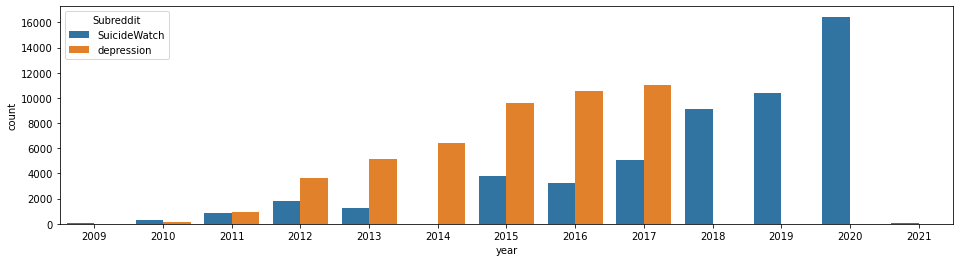

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
sns.countplot(x='year',data=df1,hue='Subreddit')

<AxesSubplot:xlabel='hour', ylabel='count'>

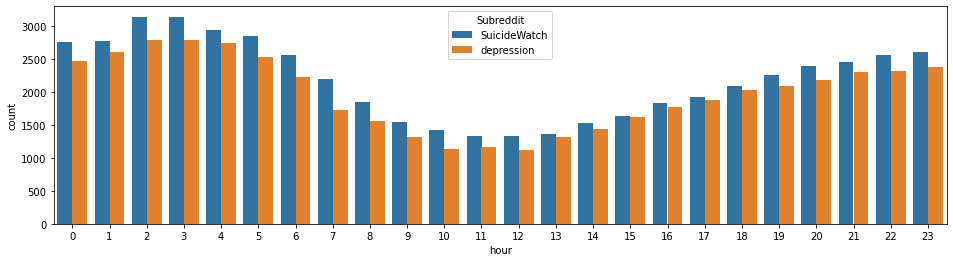

In [20]:
plt.figure(figsize=(16,4))
sns.countplot(x='hour',data=df1,hue='Subreddit')

<AxesSubplot:xlabel='Over_18', ylabel='count'>

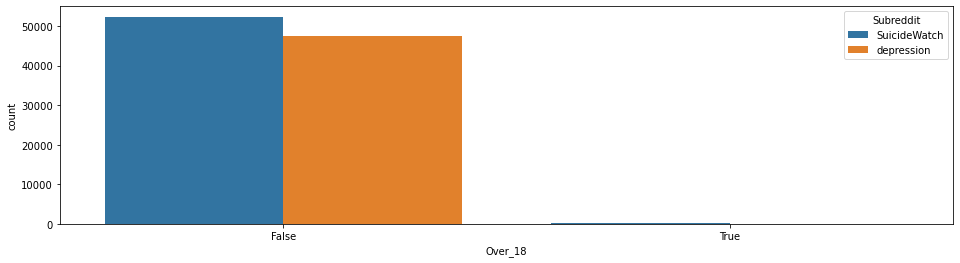

In [21]:
plt.figure(figsize=(16,4))
sns.countplot(x='Over_18',data=df1,hue='Subreddit')

In [22]:
df1.drop(['Post_id','Publish_date','Total_no_of_comments','Score','date','month'],axis=1,inplace=True)

In [23]:
df1['Over_18']=df1['Over_18'].astype(int)

In [24]:
df1['Subreddit']=df1['Subreddit'].map({'depression':0,'SuicideWatch':1})

In [25]:
title =  df1['Title'].str.lower()

In [26]:
import nltk
from nltk.stem import SnowballStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
stop_word_list=stopwords.words('english')

In [27]:
title.head(10)

0    is it normal to feel suicidal if your'e disabled?
1         i don't think things can continue like this.
2      hate my home life, but have nowhere else to go.
3                  i've started to stress-sleep again.
4       i planned on going back to work an hour ago...
5                  alone, broke, unhappy for 19 years.
6                 the holidays are the absolute worst.
7    i'm feeling the lowest i've felt in a while, a...
8    i am a foreigner in the usa. can't go back "ho...
9                       nothing is worth fighting for.
Name: Title, dtype: object

In [28]:
stem_snow = SnowballStemmer("english")

In [29]:
def neg(x):
    if x in not_list_manual:
        return 'not'
    if len(x)<2:
        return ''
    else:
        return x

In [30]:
not_list_manual=['noth','dont','cant','doesnt','didnt','wont','havent','never','isnt']
stop_list_manual=['hi','ive','someon','im','like','time','day','year', 'one','today','would','much','take','ever','point','na','done','someth','anyth','got','could','what','first','everyon','say','wors','come',\
'week','everi','month','might','fail','use','wan','told','let','gon','well','read','readi','place','ago','almost','your','call','there','mom','around','sometim','even','els','way','lot','hour','tomorrow','sinc','2','two' ,  'ask', 'soon',]

In [31]:
stop_word_list.extend(stop_list_manual)

In [32]:
stop_word_list.remove('not')

In [33]:
#import re
%time filled_title=title.str.replace(r'[^A-Za-z\s]+','').progress_apply(lambda x : ' '.join([neg(stem_snow.stem(i)) for i in nltk.word_tokenize(x) if i not in stop_word_list]))
#title.head(10).str.replace(r'^\s+|\s+?$',' ')


Wall time: 49.7 s


In [34]:
%time sent_token = nltk.sent_tokenize(' '.join(filled_title.to_list()))
%time word_token = nltk.word_tokenize(' '.join(filled_title.to_list()))

Wall time: 266 ms
Wall time: 3.39 s


In [35]:
%time ', '.join([i[0] for i in nltk.FreqDist(word_token).most_common(200)])

Wall time: 655 ms


'not, feel, depress, want, help, life, suicid, know, get, go, need, kill, think, die, anymor, friend, anyon, live, realli, someon, fuck, end, peopl, talk, thought, tri, make, pleas, thing, hate, els, better, tire, everyth, alon, year, lost, happi, keep, advic, good, bad, love, stop, last, right, back, tell, post, wish, reason, care, give, long, work, start, sure, see, someth, person, anyth, what, hope, scare, night, ill, final, find, everyon, still, tonight, sad, look, famili, pain, wors, best, world, death, shit, hard, everi, job, deal, away, day, lone, parent, commit, school, made, seem, attempt, wrong, hurt, alway, aliv, self, guy, girlfriend, cri, vent, left, mental, anxieti, happen, new, plan, lose, sleep, birthday, dead, anoth, colleg, actual, enough, stori, old, struggl, question, problem, without, leav, relationship, littl, mind, month, fail, chang, sick, readi, your, rant, sometim, medic, exist, there, sorri, turn, understand, note, felt, serious, id, come, worth, cut, head, r

In [36]:
title.head(14) #I'm just not doing well

0     is it normal to feel suicidal if your'e disabled?
1          i don't think things can continue like this.
2       hate my home life, but have nowhere else to go.
3                   i've started to stress-sleep again.
4        i planned on going back to work an hour ago...
5                   alone, broke, unhappy for 19 years.
6                  the holidays are the absolute worst.
7     i'm feeling the lowest i've felt in a while, a...
8     i am a foreigner in the usa. can't go back "ho...
9                        nothing is worth fighting for.
10                            i'm waiting for something
11                                i just wanna be happy
12                              antidepressent question
13                                        i want to die
Name: Title, dtype: object

In [37]:
filled_title.head(14).tail(1)

13    want die
Name: Title, dtype: object

In [38]:
# from wordcloud import WordCloud
# wordcloud = WordCloud(max_words=1000,width = 800, height = 800,background_color ='white',min_font_size = 10).generate(' '.join(title)) 
# plt.figure(figsize = (10, 10), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
# plt.show() 

In [39]:
# for i in set(list(filter(lambda x:len(x)<2,word_token))):
#     print(i,end='---> ')
#     print(word_freq[i])

In [40]:
bigram_fd = nltk.FreqDist(nltk.bigrams(word_token))
bigram_fd.most_common()

[(('not', 'know'), 3457),
 (('not', 'want'), 1799),
 (('want', 'die'), 1387),
 (('need', 'help'), 1205),
 (('anyon', 'els'), 990),
 (('not', 'sure'), 795),
 (('get', 'better'), 744),
 (('want', 'kill'), 684),
 (('depress', 'not'), 669),
 (('pleas', 'help'), 647),
 (('not', 'get'), 636),
 (('life', 'not'), 575),
 (('not', 'think'), 567),
 (('help', 'not'), 565),
 (('commit', 'suicid'), 565),
 (('someon', 'talk'), 563),
 (('not', 'feel'), 560),
 (('not', 'anymor'), 556),
 (('suicid', 'thought'), 552),
 (('know', 'anymor'), 542),
 (('need', 'someon'), 492),
 (('feel', 'not'), 479),
 (('die', 'not'), 447),
 (('kill', 'not'), 434),
 (('need', 'advic'), 433),
 (('not', 'go'), 427),
 (('suicid', 'not'), 415),
 (('go', 'kill'), 409),
 (('want', 'live'), 359),
 (('get', 'help'), 357),
 (('best', 'friend'), 349),
 (('want', 'end'), 342),
 (('anymor', 'not'), 338),
 (('not', 'stop'), 322),
 (('not', 'realli'), 316),
 (('not', 'see'), 302),
 (('know', 'not'), 296),
 (('last', 'night'), 291),
 (('n

In [41]:
# die
# help
# suicid
# kill
# live
# kill
# talk
# harm
# empti
# depress
# life
# mental

#pd.DataFrame({i[0]:i[1] for i in bigram_fd.most_common(1000)},index=[0]).T.to_csv('most_comm.csv')

In [42]:
def check_titile(x):
    flag1=False
    flag2=False
    if len(x)<1:
        return 0
    for i in x.split(' '):
        if i in ['want']:
            flag1=True
        if i in ['die']:
            flag2=True
    if flag1 and flag2:
        return 1
    else:
        return 0
        
temp1 = filled_title.progress_apply(lambda x:check_titile(x))

In [43]:
df1.loc[temp1[temp1==1].index][df1.loc[temp1[temp1==1].index].Subreddit==0]

,Title,Body,Over_18,Subreddit,year,hour
33,i just want to curl up and die so i won't bog ...,it's all I do \n\nit's 2:04 am and im crying a...,0,0,2014,8
308,I feel hopelessly lost and want to just lay do...,What do you say to coworkers who ask stupid sh...,0,0,2015,11
2242,I smoke and don't exercise because I want to die,This isn't a suicide post. I'm not brave enoug...,0,0,2015,17
2271,I don't want to die but this is no way to live,The title says it all. I don't want to die but...,0,0,2016,11
2541,all i want to do is die. i don't see the point...,"i posted in r/suicidenotes also, because that ...",0,0,2017,20
...,...,...,...,...,...,...
98172,"I'm about to fail out of college, be left with...",Context: I worked extremely hard in high schoo...,0,0,2014,15
98213,I want to die,This life is so difficult and I just want out....,0,0,2017,4
99299,"new vent account + not wanting to die, per say...",Been posting here for a couple of days on a di...,0,0,2017,5
99750,I want to die but can't do it...,I love gaming and live for the weekends except...,0,0,2017,11


In [44]:
Tfidf=TfidfVectorizer(ngram_range=(1,1),max_features=1000)

In [45]:
tfidf = Tfidf.fit(word_token)

In [46]:
tfidf_data = tfidf.fit_transform(filled_title)

In [47]:
tfidf_data.toarray()

array([[0.        , 0.        , 0.        , ..., 0.47774035, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [48]:
tf_df=pd.DataFrame(tfidf_data.toarray(),columns=tfidf.get_feature_names())#.to_csv('tfidf.csv')

In [49]:
# import pandas as pd
# from sklearn import preprocessing

# x = tf_df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)

In [50]:
tf_df

,abandon,abl,absolut,abus,accept,accid,accomplish,account,achiev,act,...,xpost,yeah,year,yesterday,yet,yo,young,your,youv,zoloft
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.47774,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [51]:
from sklearn.cluster import KMeans
k_means_result=[]
K=20
km = KMeans(n_clusters=K, random_state=0)
%time km.fit(tf_df)
k_means_result.append(km.inertia_)
clusters = km.labels_.tolist()

Wall time: 2min 35s


In [52]:
emp=pd.DataFrame(df1)

In [53]:
emp['Filter_data']=filled_title

In [54]:
emp['cluster']=clusters

In [55]:
emp['Int_want_die']=temp1

In [56]:
emp['cluster'].unique()

array([ 0,  9, 13,  1,  2,  3,  4, 15, 10,  6, 12,  5, 18, 14, 16,  8, 11,
        7, 17, 19], dtype=int64)

In [57]:
comm_word=[]
for ix in range(K):
    temp = [i for i in nltk.FreqDist(nltk.word_tokenize(' '.join(emp[emp['cluster']==ix]['Filter_data'])))]
    if ix==1:
        comm_word=temp.copy()
    else:
        comm_word = set(comm_word).intersection(temp)

In [58]:
comm_word=[]

In [59]:
dic={}
for i in emp.cluster.unique():
    dic[i]=' '.join([se for sent in nltk.sent_tokenize(' '.join(emp[emp['cluster']==i]['Filter_data'])) for se in nltk.word_tokenize(sent) if se not in comm_word])

In [60]:
cluster_dict={}
for i in emp.cluster.unique():
    #print(' ')
    #print('Cluster',i)
    print('    ',end='')
    cluster_dict[i]=', '.join([i[0] for i in nltk.FreqDist(dic[i].split(' ')).most_common()[:10]])

In [61]:
cluster_dict 

{0: 'suicid, thought, not, commit, feel, think, attempt, friend, depress, note',
 9: 'not, anymor, want, think, go, anyth, feel, happi, care, see',
 13: 'hate, life, not, peopl, fuck, feel, depress, everyon, everyth, friend',
 1: 'not, go, want, think, need, friend, anyon, tri, peopl, tire',
 2: 'alon, feel, not, want, go, depress, die, tire, peopl, life',
 3: 'feel, not, anyon, els, make, better, want, realli, go, lost',
 4: 'die, want, not, go, think, feel, realli, live, kill, friend',
 15: 'get, not, better, help, depress, wors, feel, want, life, need',
 10: 'know, not, anymor, depress, go, feel, want, realli, help, els',
 6: 'end, want, life, not, think, feel, go, know, tonight, rope',
 12: 'kill, want, not, go, think, tri, tonight, friend, feel, self',
 5: 'talk, someon, need, want, anyon, not, pleas, realli, feel, depress',
 18: 'help, need, not, friend, depress, someon, realli, know, want, think',
 14: 'depress, not, feel, help, think, anyon, anxieti, make, peopl, friend',
 16: 

In [62]:
final_data = pd.DataFrame(cluster_dict,index=[0]).T.reset_index()

In [63]:
emp.columns

Index(['Title', 'Body', 'Over_18', 'Subreddit', 'year', 'hour', 'Filter_data',
       'cluster', 'Int_want_die'],
      dtype='object')

In [64]:
final_data.columns=['cluster','Words']

In [65]:
final_data=final_data.merge(emp,on='cluster',how='inner')

In [66]:
final_data['cluster'].value_counts(normalize=True)

1     0.46219
9     0.06808
14    0.05377
3     0.05193
0     0.04569
15    0.03725
11    0.03590
12    0.03112
10    0.02932
18    0.02789
4     0.02535
16    0.02077
6     0.01909
8     0.01692
5     0.01664
13    0.01343
17    0.01336
2     0.01160
7     0.01054
19    0.00916
Name: cluster, dtype: float64

In [67]:
# temp.to_csv('Final_data_tdtdf_suicide.csv')

In [68]:
cluster8=final_data[final_data['cluster']==1]['Filter_data']

In [69]:
cluster8.index

Int64Index([12720, 12721, 12722, 12723, 12724, 12725, 12726, 12727, 12728,
            12729,
            ...
            58929, 58930, 58931, 58932, 58933, 58934, 58935, 58936, 58937,
            58938],
           dtype='int64', length=46219)

In [70]:
nltk.FreqDist(nltk.trigrams(nltk.word_tokenize(' '.join(cluster8)))).most_common();

In [71]:
Tfidf_clu8=TfidfVectorizer(ngram_range=(1,1),max_features=1000)

In [72]:
word_token_clu8= nltk.word_tokenize(' '.join(cluster8.to_list()))

In [73]:
tfidf_clu8 = Tfidf.fit(word_token_clu8)

In [74]:
tfidf_data_clu8 = tfidf.fit_transform(cluster8)

In [75]:
tfidf_data_clu8.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.58933586, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [76]:
tf_df_clu8=pd.DataFrame(tfidf_data_clu8.toarray(),columns=tfidf_clu8.get_feature_names())#.to_csv('tfidf.csv')

In [77]:
tf_df_clu8[['die','help','suicid','kill','live','kill','talk','harm','empti','depress','life','mental']]

,die,help,suicid,kill,live,kill,talk,harm,empti,depress,life,mental
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
46214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
cluster8.shape

(46219,)

In [79]:
from sklearn.cluster import KMeans
k_means_result=[]
K=10
km = KMeans(n_clusters=K, random_state=0)
%time km.fit(tf_df_clu8)
k_means_result.append(km.inertia_)
clusters_clu8 = km.labels_.tolist()

Wall time: 34.8 s


In [80]:
emp_clu8=pd.DataFrame(final_data[final_data['cluster']==1])

In [81]:
emp_clu8

,cluster,Words,Title,Body,Over_18,Subreddit,year,hour,Filter_data,Int_want_die
12720,1,"not, go, want, think, need, friend, anyon, tri...",I've started to stress-sleep again.,I used to do it before to escape the conscious...,0,0,2013,6,start stresssleep,0
12721,1,"not, go, want, think, need, friend, anyon, tri...",I planned on going back to work an hour ago...,But I'm still in bed on my 'lunch break.' If a...,0,0,2016,18,plan go back work,0
12722,1,"not, go, want, think, need, friend, anyon, tri...",The Holidays are the Absolute Worst.,I don't get how people are so fucking cheery t...,0,0,2016,18,holiday absolut worst,0
12723,1,"not, go, want, think, need, friend, anyon, tri...","I am a foreigner in the USA. Can't go back ""ho...",I have observed how many homeless have to live...,0,1,2019,10,foreign usa not go back home homeless,0
12724,1,"not, go, want, think, need, friend, anyon, tri...",I'm waiting for something,I'm in a somewhat better place now (this doesn...,0,0,2016,5,wait someth,0
...,...,...,...,...,...,...,...,...,...,...
58934,1,"not, go, want, think, need, friend, anyon, tri...",I'm always angry. Always. And the blackouts ha...,"First off, this is not a throwaway account; I ...",0,0,2011,6,alway angri alway blackout reach theyr scare,0
58935,1,"not, go, want, think, need, friend, anyon, tri...",No one cares,No one cares No one cares No one cares No one ...,0,1,2019,18,care,0
58936,1,"not, go, want, think, need, friend, anyon, tri...",Is it weird that the only thing that makes me ...,Honestly I've been dealing with depression for...,0,0,2014,17,weird thing make happi comput,0
58937,1,"not, go, want, think, need, friend, anyon, tri...",Looking for some advice from you good people,"Hi, everyone.\n\nI apologize right off the bat...",0,1,2015,20,look advic good peopl,0


In [82]:
emp_clu8['cluster_clu8']=clusters_clu8

In [83]:
emp_clu8['cluster_clu8'].unique()

array([2, 7, 1, 8, 4, 6, 5, 0, 9, 3], dtype=int64)

In [84]:
comm_word=[]
for ix in range(K):
    temp = [i for i in nltk.FreqDist(nltk.word_tokenize(' '.join(emp_clu8[emp_clu8['cluster_clu8']==ix]['Filter_data'])))]
    if ix==1:
        comm_word=temp.copy()
    else:
        comm_word = set(comm_word).intersection(temp)

In [85]:
comm_word=[]

In [86]:
dic={}
for i in emp_clu8.cluster_clu8.unique():
    dic[i]=' '.join([se for sent in nltk.sent_tokenize(' '.join(emp_clu8[emp_clu8['cluster_clu8']==i]['Filter_data'])) for se in nltk.word_tokenize(sent) if se not in comm_word])

In [87]:
cluster_dict={}
for i in emp_clu8.cluster_clu8.unique():
    #print(' ')
    #print('Cluster',i)
    print('    ',end='')
    cluster_dict[i]=', '.join([i[0] for i in nltk.FreqDist(dic[i].split(' ')).most_common()[:10]])

In [88]:
cluster_dict 

{2: 'not, want, think, need, friend, peopl, tri, realli, thought, make',
 7: 'go, think, not, want, readi, back, away, final, what, hospit',
 1: 'keep, go, thing, aliv, tri, not, reason, find, back, want',
 8: 'there, not, hope, someth, anymor, think, left, reason, world, know',
 4: 'long, not, post, sorri, stori, go, need, want, term, vent',
 6: 'lost, everyth, friend, job, hope, best, love, last, complet, motiv',
 5: 'mother, pass, away, not, thought, go, famili, year, father, anoth',
 0: 'anyon, els, experi, not, want, tri, relat, go, think, thing',
 9: 'tire, fight, everyth, tri, sick, realli, exist, aliv, want, lone',
 3: 'made, mistak, decis, friend, not, mind, final, think, wors, post'}

In [89]:
temp = pd.DataFrame(cluster_dict,index=[0]).T.reset_index()

In [90]:
temp.columns=['cluster','Words_for_cluster']

In [91]:
tempx=temp.merge(emp_clu8,on='cluster',how='inner')

In [92]:
without8=final_data[final_data.cluster!=1]

In [93]:
without8.columns

Index(['cluster', 'Words', 'Title', 'Body', 'Over_18', 'Subreddit', 'year',
       'hour', 'Filter_data', 'Int_want_die'],
      dtype='object')

In [94]:
tempx['cluster']=tempx['cluster'].astype(str)+tempx['cluster_clu8'].astype(str)

In [95]:
tempx.drop('cluster_clu8',axis=1,inplace=True)

In [96]:
tempx.columns

Index(['cluster', 'Words_for_cluster', 'Words', 'Title', 'Body', 'Over_18',
       'Subreddit', 'year', 'hour', 'Filter_data', 'Int_want_die'],
      dtype='object')

In [97]:
final_data = pd.concat([tempx,without8])

In [98]:
def check(x):
    va1=x['Words_for_cluster']
    va2=x['Words']
    if not isinstance(va1,float):
        return va1+va2
    return va2
final_data['final_cluster_words']=final_data.apply(lambda x : check(x),axis=1)

In [99]:
final_data['cluster'].value_counts(normalize=True)

12    0.40552
9     0.06808
14    0.05377
3     0.05193
0     0.04569
15    0.03725
11    0.03590
12    0.03112
10    0.02932
18    0.02789
4     0.02535
16    0.02077
6     0.01909
8     0.01692
5     0.01664
17    0.01534
13    0.01343
17    0.01336
2     0.01160
7     0.01054
10    0.01031
19    0.00916
19    0.00798
16    0.00589
11    0.00517
14    0.00501
13    0.00344
15    0.00179
18    0.00174
Name: cluster, dtype: float64

In [100]:
final_Inc=['depress','die','help','kill','suicid','life','happi','mental','not']

In [101]:
final_data.reset_index(drop=True,inplace=True)

In [102]:
def get_inc_list(x):
    word=nltk.word_tokenize(x)
    curr={}
    if len(x)<1:
        for j in final_Inc:
            curr[j]=False
            curr[j+'_index']=-1
        return curr
    for j in final_Inc:
        curr[j]=(j in word)
        if curr.get(j):
            curr[j+'_index']=word.index(j)+1
        else:
            curr[j+'_index']=-1
    return curr
            
Inc_list_df=pd.DataFrame(final_data['Filter_data'].progress_apply(lambda x:get_inc_list(x)).to_dict()).T

In [103]:
df_final_dis=pd.concat([final_data[['Filter_data','cluster','final_cluster_words']],Inc_list_df],axis=1)

In [104]:
df_final_dis[df_final_dis.columns[3:-1]].sum()/len(df_final_dis)

depress          0.08012
depress_index   -0.66545
die              0.03254
die_index       -0.85208
help             0.05723
help_index      -0.74583
kill             0.04083
kill_index      -0.82080
suicid           0.05559
suicid_index    -0.76375
life             0.05649
life_index      -0.75259
happi            0.01261
happi_index     -0.94252
mental           0.00585
mental_index    -0.97306
not              0.20158
dtype: float64

In [105]:
import scipy.spatial.distance as dist

In [106]:
final_Inc

['depress', 'die', 'help', 'kill', 'suicid', 'life', 'happi', 'mental', 'not']

In [107]:
df_final_dis

,Filter_data,cluster,final_cluster_words,depress,depress_index,die,die_index,help,help_index,kill,...,suicid,suicid_index,life,life_index,happi,happi_index,mental,mental_index,not,not_index
0,start stresssleep,12,"keep, go, thing, aliv, tri, not, reason, find,...",False,-1,False,-1,False,-1,False,...,False,-1,False,-1,False,-1,False,-1,False,-1
1,plan go back work,17,"keep, go, thing, aliv, tri, not, reason, find,...",False,-1,False,-1,False,-1,False,...,False,-1,False,-1,False,-1,False,-1,False,-1
2,holiday absolut worst,12,"keep, go, thing, aliv, tri, not, reason, find,...",False,-1,False,-1,False,-1,False,...,False,-1,False,-1,False,-1,False,-1,False,-1
3,foreign usa not go back home homeless,17,"keep, go, thing, aliv, tri, not, reason, find,...",False,-1,False,-1,False,-1,False,...,False,-1,False,-1,False,-1,False,-1,True,3
4,wait someth,12,"keep, go, thing, aliv, tri, not, reason, find,...",False,-1,False,-1,False,-1,False,...,False,-1,False,-1,False,-1,False,-1,False,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,not sure anymor,19,"sure, not, depress, feel, go, realli, help, an...",False,-1,False,-1,False,-1,False,...,False,-1,False,-1,False,-1,False,-1,True,1
99996,not sure depress,19,"sure, not, depress, feel, go, realli, help, an...",True,3,False,-1,False,-1,False,...,False,-1,False,-1,False,-1,False,-1,True,1
99997,not sure,19,"sure, not, depress, feel, go, realli, help, an...",False,-1,False,-1,False,-1,False,...,False,-1,False,-1,False,-1,False,-1,True,1
99998,not sure go,19,"sure, not, depress, feel, go, realli, help, an...",False,-1,False,-1,False,-1,False,...,False,-1,False,-1,False,-1,False,-1,True,1


In [108]:
print(df_final_dis.loc[1]['Filter_data'])
print(df_final_dis.loc[4]['Filter_data'])

plan go back work
wait someth


In [109]:
dist.cosine(df_final_dis[df_final_dis.columns[3:-1]].loc[0].astype(int).values,df_final_dis[df_final_dis.columns[3:-1]].loc[5].astype(int).values)

0.2928932188134524

In [110]:
df_final_dis[df_final_dis[final_Inc].sum(axis=1)==5]

,Filter_data,cluster,final_cluster_words,depress,depress_index,die,die_index,help,help_index,kill,...,suicid,suicid_index,life,life_index,happi,happi_index,mental,mental_index,not,not_index
66444,suicid year engag bright physic career ahead a...,4,"die, want, not, go, think, feel, realli, live,...",False,-1,True,17,False,-1,True,...,True,1,False,-1,True,15,False,-1,True,13


In [111]:
def check_dis(x):
    li=[]
    for i in final_Inc[:-1]:
        if x[i] and x['not']:
            li.extend([i,x['not_index']-x[i+'_index']])
#         elif x['not']:
#             li.extend(['not',x['not_index']])
    return li if li else None
df_final_dis['distance']=df_final_dis.progress_apply(lambda x:check_dis(x),axis=1)

In [114]:
df_final_dis[~df_final_dis['distance'].isna()][filter(lambda x:not x.endswith('index'),df_final_dis.columns)]

,Filter_data,cluster,final_cluster_words,depress,die,help,kill,suicid,life,happi,mental,not,distance
37,there not hold back form die arent dead yet,18,"keep, go, thing, aliv, tri, not, reason, find,...",False,True,False,False,False,False,False,False,True,"[die, -4]"
162,not encorag not depress peopl tri anyth anyon ...,12,"keep, go, thing, aliv, tri, not, reason, find,...",True,False,False,False,False,False,False,True,True,"[depress, -3, mental, -16]"
270,mental ill peopl deserv treat peopl not pawn a...,12,"keep, go, thing, aliv, tri, not, reason, find,...",False,False,False,False,False,False,False,True,True,"[mental, 6]"
282,not know want achiev post hope someon els help...,12,"keep, go, thing, aliv, tri, not, reason, find,...",False,False,True,False,False,False,False,False,True,"[help, -8]"
653,parent agre go away school theyv chang mind no...,12,"keep, go, thing, aliv, tri, not, reason, find,...",False,False,False,True,False,False,False,False,True,"[kill, -3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99982,not sure whether depress normal person rant,19,"sure, not, depress, feel, go, realli, help, an...",True,False,False,False,False,False,False,False,True,"[depress, -3]"
99985,not sure put seek help,19,"sure, not, depress, feel, go, realli, help, an...",False,False,True,False,False,False,False,False,True,"[help, -4]"
99987,not sure actual depress still get help,19,"sure, not, depress, feel, go, realli, help, an...",True,False,True,False,False,False,False,False,True,"[depress, -3, help, -6]"
99994,think may depress not sure anyon help,19,"sure, not, depress, feel, go, realli, help, an...",True,False,True,False,False,False,False,False,True,"[depress, 1, help, -3]"


In [115]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [131]:
# [nltk.word_tokenize(i) for i in df_final_dis.Filter_data.to_list()]

In [188]:
df_final_dis.Filter_data.head(10)

0                        start stresssleep
1                        plan go back work
2                    holiday absolut worst
3    foreign usa not go back home homeless
4                              wait someth
5                                    happi
6                     antidepress question
7                             youv everyth
8                                       hi
9                      urg bad thing scare
Name: Filter_data, dtype: object

In [186]:
def return_NN(x):
    return ' '.join([i[0] for i in nltk.pos_tag(nltk.word_tokenize(x)) if i[1]=='NN'])

0    start stresssleep
1            plan work
2              holiday
3        home homeless
4          wait someth
5                happi
6             question
7         youv everyth
8                   hi
9          thing scare
Name: Filter_data, dtype: object

In [191]:
data = df_final_dis.Filter_data.progress_apply(lambda x:return_NN(x)).values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])


['start', 'stresssleep']


In [192]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)
texts = data_words

# # Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# # View
# print(corpus[:1][0][:30])

In [193]:
{0: 'start',
 1: 'stresssleep',
 2: 'back',
 3: 'go',
 4: 'plan',
 5: 'work',
 6: 'absolut',
 7: 'holiday'}

{0: 'start',
 1: 'stresssleep',
 2: 'back',
 3: 'go',
 4: 'plan',
 5: 'work',
 6: 'absolut',
 7: 'holiday'}

In [194]:
texts[3];

In [195]:
corpus[3];

In [196]:
corpus;

In [197]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)


[(0,
  '0.147*"anyon" + 0.041*"look" + 0.036*"hope" + 0.030*"plan" + 0.023*"kind" + '
  '0.021*"commit" + 0.021*"support" + 0.019*"hurt" + 0.017*"futur" + '
  '0.016*"littl"'),
 (1,
  '0.462*"life" + 0.108*"feel" + 0.091*"kill" + 0.046*"depress" + '
  '0.039*"reason" + 0.022*"get" + 0.015*"care" + 0.010*"lone" + 0.010*"guy" + '
  '0.007*"reddit"'),
 (2,
  '0.104*"depress" + 0.086*"realli" + 0.061*"person" + 0.057*"post" + '
  '0.044*"hate" + 0.043*"pain" + 0.030*"tonight" + 0.027*"everyon" + '
  '0.025*"month" + 0.023*"struggl"'),
 (3,
  '0.129*"depress" + 0.088*"tire" + 0.071*"live" + 0.056*"think" + '
  '0.050*"anxieti" + 0.029*"problem" + 0.023*"birthday" + 0.021*"sever" + '
  '0.019*"alreadi" + 0.017*"rant"'),
 (4,
  '0.192*"someon" + 0.173*"talk" + 0.084*"depress" + 0.031*"girlfriend" + '
  '0.030*"world" + 0.025*"alon" + 0.024*"tell" + 0.018*"chang" + '
  '0.016*"famili" + 0.014*"peopl"'),
 (5,
  '0.208*"fuck" + 0.095*"die" + 0.078*"friend" + 0.065*"suicid" + 0.062*"want" '
  '+ 

In [202]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_topics=5,num_words=30))
doc_lda = lda_model[corpus]

[(3,
  '0.129*"depress" + 0.088*"tire" + 0.071*"live" + 0.056*"think" + '
  '0.050*"anxieti" + 0.029*"problem" + 0.023*"birthday" + 0.021*"sever" + '
  '0.019*"alreadi" + 0.017*"rant" + 0.016*"part" + 0.015*"thought" + '
  '0.015*"dae" + 0.012*"joke" + 0.011*"treatment" + 0.010*"see" + 0.010*"game" '
  '+ 0.010*"subreddit" + 0.009*"bit" + 0.009*"watch" + 0.008*"guess" + '
  '0.008*"term" + 0.008*"go" + 0.007*"hi" + 0.007*"sort" + 0.007*"drop" + '
  '0.007*"button" + 0.007*"enjoy" + 0.006*"attack" + 0.006*"xpost"'),
 (8,
  '0.167*"anymor" + 0.115*"depress" + 0.038*"ruin" + 0.037*"work" + '
  '0.033*"relationship" + 0.031*"happi" + 0.029*"love" + 0.027*"colleg" + '
  '0.023*"ill" + 0.022*"sometim" + 0.020*"everi" + 0.019*"fall" + 0.019*"turn" '
  '+ 0.018*"anyth" + 0.017*"vent" + 0.015*"peopl" + 0.013*"share" + '
  '0.012*"break" + 0.011*"doctor" + 0.010*"mani" + 0.010*"issu" + '
  '0.010*"anybodi" + 0.009*"experi" + 0.009*"disord" + 0.008*"amp" + '
  '0.008*"bore" + 0.007*"partner" + 0.